In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from scipy.misc import toimage
import pandas as pd
%matplotlib inline

In [2]:
s1 = np.asarray([0,0,1])
r = 28
n = np.linalg.norm(s1) 

In [3]:
source = [[0.8389/12,0.7193/12,1],[0.5773,0.6363,1],[0.3638,0.5865,1],[0.1763,0.5596,1],[-.1763,-0.5596,1],[-0.3638,-0.5865,1],[-0.5773,-0.6363,1],[-0.8389,-0.7193,1]]
source = np.asarray(source)
print("source",source)
r = 24
norm = np.linalg.norm(source,axis=1)
norm = np.reshape(norm,(len(norm),1))

source [[ 0.06990833  0.05994167  1.        ]
 [ 0.5773      0.6363      1.        ]
 [ 0.3638      0.5865      1.        ]
 [ 0.1763      0.5596      1.        ]
 [-0.1763     -0.5596      1.        ]
 [-0.3638     -0.5865      1.        ]
 [-0.5773     -0.6363      1.        ]
 [-0.8389     -0.7193      1.        ]]


In [4]:
img_size = 64
x_range = np.arange(-32,32,1)
y_range = np.arange(32,-32,-1)
xx,yy = np.meshgrid(x_range,y_range)

tmp1 = (r**2-(xx**2+yy**2))

true_p = np.zeros((tmp1.shape))
true_q = np.zeros((tmp1.shape))
true_p[tmp1>0] = xx[tmp1>0]/((tmp1[tmp1>0])**0.5)
true_p[tmp1<0] = 0
true_q[tmp1>0] = yy[tmp1>0]/((tmp1[tmp1>0])**0.5)
true_q[tmp1<0] = 0

In [5]:
z = np.zeros((8,img_size,img_size))
tmp = r**2 - (xx**2 + yy**2)
tmp[tmp>0] = (tmp[tmp>0])**0.5

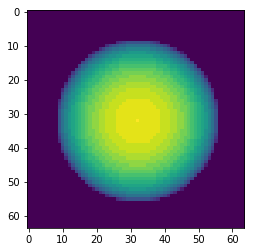

In [6]:
plt.figure(figsize=(12,12))
f1 = np.zeros((img_size,img_size))
f1[tmp>0] = (xx[tmp>0]*s1[0] + yy[tmp>0]*s1[1] + tmp[tmp>0])/(r*n)
plt.figure(figsize=(4,4))
plt.imshow(f1)
plt.show()

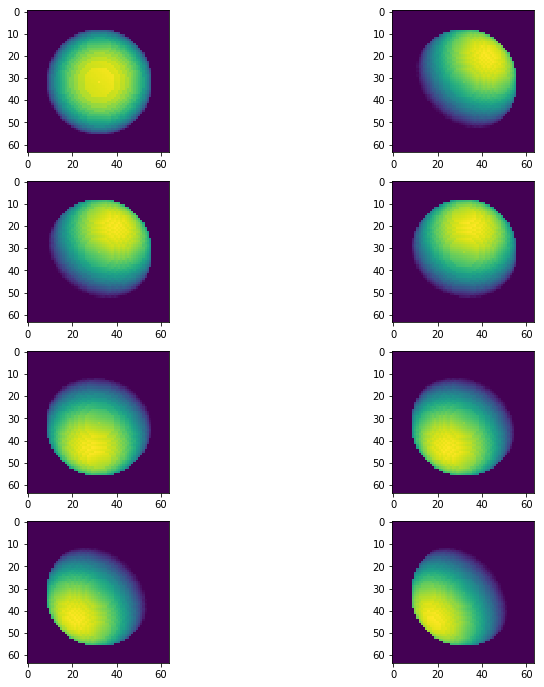

In [7]:
plt.figure(figsize=(12,12))
for i in range(len(source)):
    z[i][tmp>0] = (xx[tmp>0]*source[i,0] + yy[tmp>0]*source[i,1] + tmp[tmp>0])/(r*norm[i][0])
    z[i][z[i]<0] = 0
    plt.subplot(4,2,i+1)
    plt.imshow(z[i])
    #plt.colorbar()
plt.show()

In [8]:
tmp = np.asarray([-1,-1,1])
tmp = np.tile(tmp,(len(source),1))
S = source*tmp
norm = np.tile(norm,(1,3))
S = S/norm
print(S)

[[-0.06961379 -0.05968911  0.99578669]
 [-0.43788247 -0.48263401  0.75850073]
 [-0.29941295 -0.48269844  0.82301525]
 [-0.15205997 -0.48265887  0.86250692]
 [ 0.15205997  0.48265887  0.86250692]
 [ 0.29941295  0.48269844  0.82301525]
 [ 0.43788247  0.48263401  0.75850073]
 [ 0.56288759  0.48263803  0.67098294]]


# Finding p and q using psuedoinverse

In [9]:
p = np.zeros((z[1].shape))
q = np.zeros((z[1].shape))
rho = np.zeros((z[1].shape))
for x in np.arange(0,64,1):
    for y in np.arange(0,64,1):
        E = z[:,x,y]
        b = np.dot(np.linalg.pinv(S),E)
        if(b[2] != 0):
            p[x,y] = -1*b[0]/b[2]
            q[x,y] = -1*b[1]/b[2]
            rho[x,y] = b[2]*((1+p[x,y]**2+q[x,y]**2)**0.5 )

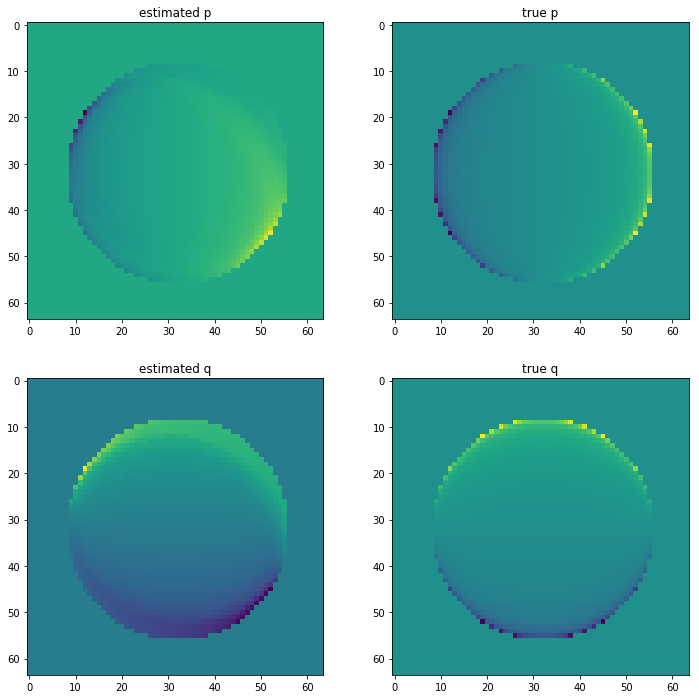

In [10]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("estimated p")
plt.imshow(p)
plt.subplot(2,2,2)
plt.title("true p")
plt.imshow(true_p)
plt.subplot(2,2,3)
plt.title("estimated q")
plt.imshow(q)
plt.subplot(2,2,4)
plt.title("true q")
plt.imshow(true_q)
plt.show()

In [11]:
max_true_p = np.amax(true_p)
maxp = np.amax(p)
max_true_q = np.amax(true_q)
maxq = np.amax(q)
print("max true p: %f, max p: %f, max true q: %f, max q: %f" %(max_true_p,maxp,max_true_q,maxq))

max true p: 7.559289, max p: 4.655833, max true q: 7.559289, max q: 4.440067


In [12]:
min_true_p = np.amin(true_p)
minp = np.amin(p)
min_true_q = np.amin(true_q)
minq = np.amin(q)
print("min true p: %f, min p: %f, min true q: %f, min q: %f" %(min_true_p,minp,min_true_q,minq))

min true p: -7.559289, min p: -6.970501, min true q: -7.559289, min q: -3.206981


In [13]:
#Difference
mse_p = np.mean(np.square(true_p-p))
mse_q = np.mean(np.square(true_q-q))
print("MSE in p: %f. MSE in q: %f" %(mse_p,mse_q))

MSE in p: 0.223206. MSE in q: 0.165934


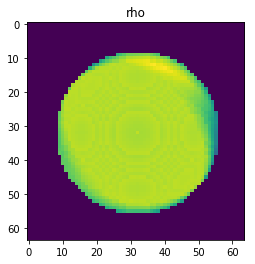

In [14]:
plt.imshow(rho)
plt.title("rho")
plt.show()

# Estimating p and q using SVD decomposition

In [20]:
p2 = np.zeros((z[1].shape))
q2 = np.zeros((z[1].shape))
rho2 = np.zeros((z[1].shape))
[u,s,v] = np.linalg.svd(S)
for x in np.arange(0,64,1):
    for y in np.arange(0,64,1):
        E = z[:,x,y]
        utb = np.dot(u.T,E)
        utb = utb[0:len(s)]
        
        b = np.dot(v.T,utb/s)
        if(b[2] != 0):
            p2[x,y] = -1*b[0]/b[2]
            q2[x,y] = -1*b[1]/b[2]
            rho2[x,y] = b[2]*((1+p2[x,y]**2+q2[x,y]**2)**0.5 )



In [21]:
max_true_p = np.amax(true_p)
maxp2 = np.amax(p2)
max_true_q = np.amax(true_q)
maxq2 = np.amax(q2)
print("max true p: %f, max p2: %f, max true q: %f, max q2: %f" %(max_true_p,maxp2,max_true_q,maxq2))

max true p: 7.559289, max p2: 4.655833, max true q: 7.559289, max q2: 4.440067


In [22]:
min_true_p = np.amin(true_p)
minp2 = np.amin(p2)
min_true_q = np.amin(true_q)
minq2 = np.amin(q2)
print("min true p: %f, min p: %f, min true q: %f, min q: %f" %(min_true_p,minp2,min_true_q,minq2))

min true p: -7.559289, min p: -6.970501, min true q: -7.559289, min q: -3.206981


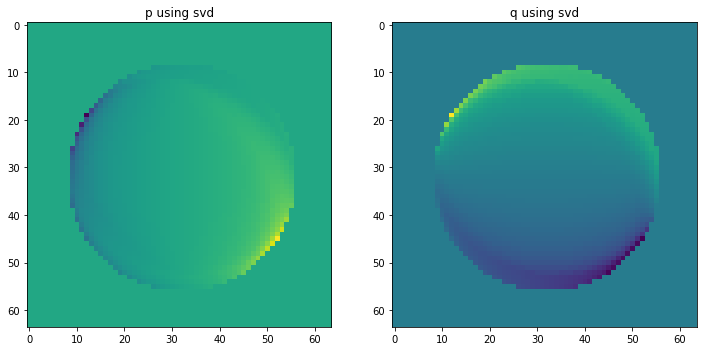

In [23]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("p using svd")
plt.imshow(p2)
plt.subplot(1,2,2)
plt.title("q using svd")
plt.imshow(q2)
plt.show()

In [24]:
#MSE using SVD
mse_p2 = np.mean(np.square(true_p-p2))
mse_q2 = np.mean(np.square(true_q-q2))
print("MSE in p: %f. MSE in q: %f" %(mse_p2,mse_q2))

MSE in p: 0.223206. MSE in q: 0.165934
